# Gradient Descent
This notebook demonstrates the gradient descent approach to determine the best fitting parameters by linear regression. 



In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import sklearn.decomposition
import math
from sklearn import preprocessing

import matplotlib
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tqdm.notebook import tqdm
from ipywidgets import interact
%matplotlib inline

## Part 1 - Toy Example
Firstly, we demonstrate gradient descent on a simple linear regression problem with one dependent and one independent variable.

In [13]:
X = np.array([1,1,2,3,4,5,6,7,8,9,10,10])
y = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

x and y values are plotted in a diagram.

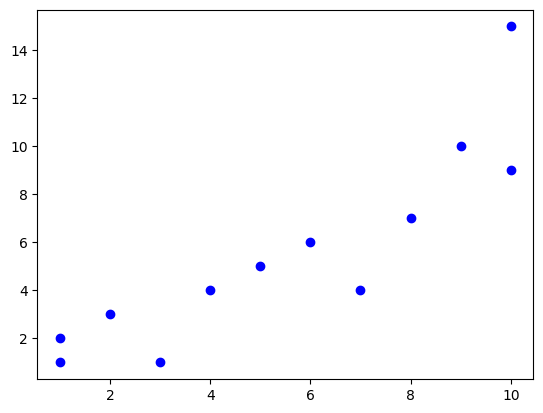

In [14]:
plt.plot(X, y, 'bo')
plt.show()

We then try to fit the points by a straight line.

In [15]:
theta0 = -0.5
theta1 = 1

In [16]:
def predict(X, theta0, theta1):
    y_pred = theta0 + theta1 * X
    return y_pred

y_pred = predict(X, theta0, theta1)

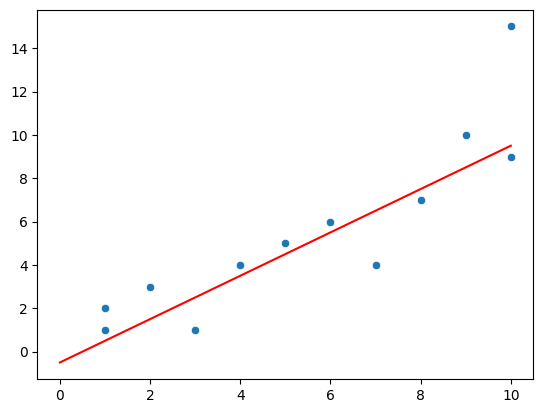

In [17]:
def plot_regression_line(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min()-1, X.max()+1, 1).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    ax.plot(x, y_pred, color="r")
    
ax = sns.scatterplot(X, y)
plot_regression_line(X, theta0, theta1, ax)
plt.show()

This does not look so bad. Let's implement a gradient descent algorithm to do this automatically.

### Cost function
We define a cost function that determines the mean squared error of the predicted and the actual y coordinates. To get rid of the factor 2 in the gradient
formula, we divide the sum by 2.

> Implement the MSE cost function

In [18]:
def cost(y, y_pred):
    return ((y - y_pred) ** 2).mean() / 2

In [19]:
cost(y, y_pred)

1.9583333333333333

### Calculate gradient

Next, let us determine the gradient of y in respect to the parameters.

**Programming Assignment - Verification on Ilias**

> Implement the `gradient` function

In [20]:
def gradient(X, y, theta0, theta1):
    y_pred = predict(X, theta0, theta1)
    epsilon = y_pred - y

    grad_theta0 = epsilon.mean()
    grad_theta1 = (epsilon * X).mean()
    
    return grad_theta0, grad_theta1

*Hint: Carefully look at the definition of the cost function of Linear Regression, to calculate the gradient & take care of dimensions*

**Report the value of the gradients in the Ilias Quiz 04B Notebook Verification**

In [21]:
gradient(X, y, theta0, theta1)

(-0.5833333333333334, -4.166666666666667)

### Batch Gradient descent


> Now complete the `fit` function by iteratively updating our model parameters.

To visualize how the parameters and cost functions change with each epoch, we store them in a dictionary.

In [22]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs + 1)):
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        print(theta0)
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)

        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return theta0, theta1, hist

In [23]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=2)

  0%|          | 0/20 [00:00<?, ?it/s]

0.017424532557410163
0.027176217436828444
Epoch 2 -  cost: 2.0445294419915756
0.03242142627875013
0.0350203511617349
Epoch 4 -  cost: 1.8039936615551495
0.03606582358967861
0.036199862433418224
Epoch 6 -  cost: 1.775096067880287
0.03579964102115982
0.03508673996932773
Epoch 8 -  cost: 1.7714113397645443
0.034191331555292595
0.03318988705794682
Epoch 10 -  cost: 1.7707323807095479
0.03212732924548871
0.03103004662429965
Epoch 12 -  cost: 1.7704138470999158
0.02991353911176075
0.028786909752468923
Epoch 14 -  cost: 1.7701406008169436
0.027655503533026978
0.026522457645490497
Epoch 16 -  cost: 1.7698750791565325
0.025389612243493627
0.02425804549757217
Epoch 18 -  cost: 1.7696127845600822
0.023128387931991866
0.02200100709282571
Epoch 20 -  cost: 1.7693531584332245


### Visualize learning 
We can now visualize the learning process by plotting the validation curve. The validation curve shows how the cost decreases by increasing number of epochs.

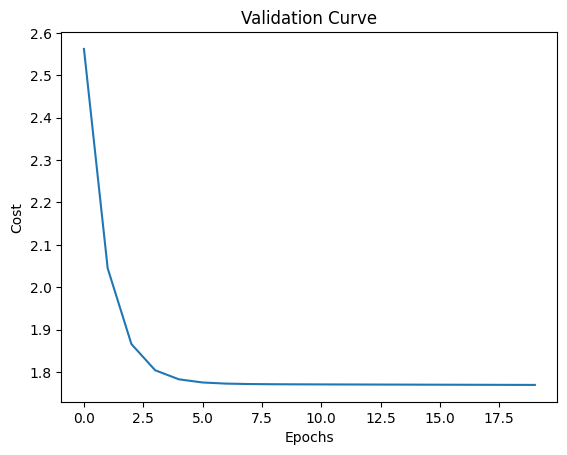

In [24]:
def plot_validation_curve(data, ax=None, ylim=None):
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title("Validation Curve")
        ax.set_ylabel("Cost")
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel("Epochs")
    ax.plot(data)
    
plot_validation_curve(hist["cost"])

Using our history, we can now visualize how the parameters change by each epoch.

In [25]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X, y)
    plot_regression_line(X, hist["theta0"][epoch-1], hist["theta1"][epoch-1], ax)
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Contour plot
We can visualize how our model parameters $\Theta$ change after each epoch by displaying a contour plot.

In [26]:
def parallel_cost(Theta0, Theta1, X, y):
    m = Theta0.shape[0]
    n = Theta0.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(X)):
        tot += (Theta0 + Theta1 * X[i] - y[i]) ** 2;
    return tot/(2*len(X))

In [27]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

def contour_plot_zoomed(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(-0.5, 0.5, delta)
    t1 = np.arange(0.5, 1.5, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [0.25,0.5,1,2,3])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [28]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot_zoomed(X, y)
    for i in range(epoch):
        theta0 = hist["theta0"][i]
        theta1 = hist["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist["theta0"][i-1]
        theta1_prev = hist["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Normalise data
Let's run the experiment above again but this time first normalise the data and see what happens.
We use the `StandardScaler` which implements z-normalisation.

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1)
X_scaled

array([-1.40556386, -1.40556386, -1.09321633, -0.78086881, -0.46852129,
       -0.15617376,  0.15617376,  0.46852129,  0.78086881,  1.09321633,
        1.40556386,  1.40556386])

#### Apply gradient descent algorithm on normalised data.

  0%|          | 0/20 [00:00<?, ?it/s]

0.05583333333333333
0.11110833333333334
Epoch 2 -  cost: 24.400255107396404
0.16583058333333334
0.22000561083333334
Epoch 4 -  cost: 23.507484391062757
0.27363888805833336
0.32673583251108335
Epoch 6 -  cost: 22.649892403107817
0.37930180751930587
0.43134212277744616
Epoch 8 -  cost: 21.82609296127033
0.48286203488300505
0.5338667478675083
Epoch 10 -  cost: 21.03475450440101
0.5843614137221665
0.6343511329182783
Epoch 12 -  cost: 20.274597940172793
0.6838409549224288
0.7328358787065379
Epoch 14 -  cost: 19.544394577599853
0.7813408532528059
0.8293607780536112
Epoch 16 -  cost: 18.842964141023703
0.8769005036064084
0.9239648319036776
Epoch 18 -  cost: 18.1691728623561
0.9705585169179742
1.0166862650821278
Epoch 20 -  cost: 17.521931648495197


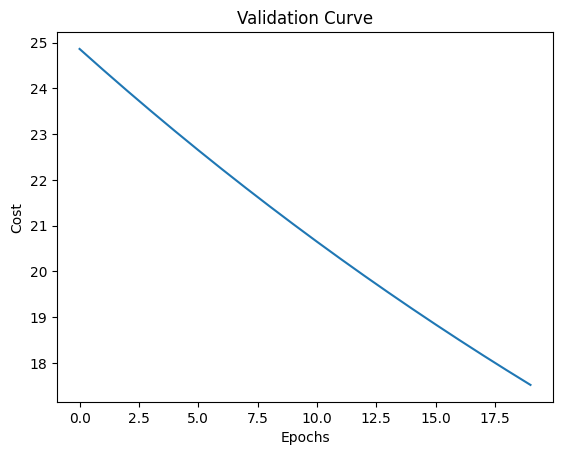

In [30]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist_scaled = fit(X_scaled, y, alpha, num_epochs, display_every=2)
plot_validation_curve(hist_scaled["cost"])

It seems like it did not converge yet. Let's increase the learning rate $\alpha$ and the number of epochs and run it again.

  0%|          | 0/50 [00:00<?, ?it/s]

0.5583333333333333
1.0608333333333333
1.5130833333333333
1.9201083333333333
2.286430833333333
Epoch 5 -  cost: 7.99533805005404
2.6161210833333333
2.9128423083333335
3.1798914108333336
3.4202356030833334
3.6365453761083333
Epoch 10 -  cost: 3.923312300186614
3.8312241718308333
4.0064350879810835
4.164124912516309
4.306045754598012
4.433774512471544
Epoch 15 -  cost: 2.503484713675806
4.548730394557723
4.652190688435284
4.745304952925089
4.829107790965914
4.904530345202656
Epoch 20 -  cost: 2.00842144560027
4.972410644015723
5.033502912947484
5.088485954986069
5.1379706928207955
5.182506956872049
Epoch 25 -  cost: 1.8358035575368845
5.222589594518178
5.258663968399693
5.291130904893057
5.320351147737085
5.3466493662967105
Epoch 30 -  cost: 1.7756154215935869
5.370317763000373
5.391619320033669
5.410790721363636
5.428044982560606
5.443573817637879
Epoch 35 -  cost: 1.754629116240351
5.457549769207424
5.470128125620015
5.481448646391347
5.491637115085545
5.500806736910325
Epoch 40 -  cost

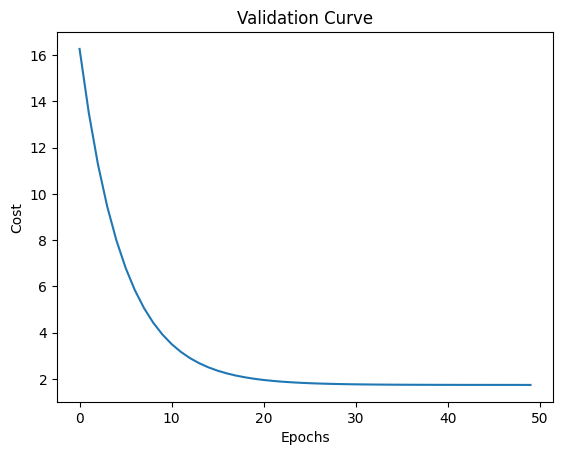

In [31]:
alpha = 0.1
num_epochs = 50

theta0, theta1, hist_scaled = fit(X_scaled, y, alpha, num_epochs, display_every=5)
plot_validation_curve(hist_scaled["cost"])

That looks much better now. Okay, let's plot the contours.

In [32]:
def contour_plot(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(0, 9, delta)
    t1 = np.arange(0, 9, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [1,2,3,4,5,6])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [33]:
@interact(epoch=(1, len(hist_scaled["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot(X_scaled, y)
    for i in range(epoch):
        theta0 = hist_scaled["theta0"][i]
        theta1 = hist_scaled["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist_scaled["theta0"][i-1]
        theta1_prev = hist_scaled["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=50, min=1), Output()), _dom_classes=('widget…

The contours are not as narrow as before. 

<span style="color:red">
    Make sure that you never forget to scale your data before applying the gradient descent algorithm!</span>

## Part 2 - House prices data set
Now that we have tested our functions with our toy datset, let's move to a the house price dataset.

In [34]:
df_house = pd.read_csv('house_prices.csv')
df_house.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We want to predict the price of a house based on its size.

Let's split the feature from the target variable.

In [35]:
X_house = df_house[["Size"]].values
y_house = df_house.Price.values

Next, we further split the data into a training and test set.

In [36]:
split = train_test_split(X_house, y_house, test_size=0.2, random_state=42)
(X_train_house, X_test_house, y_train_house, y_test_house) = split
X_train_house = X_train_house.reshape(-1)
X_test_house = X_test_house.reshape(-1)

Here we visualize our training data in a scatter plot.

<AxesSubplot:>

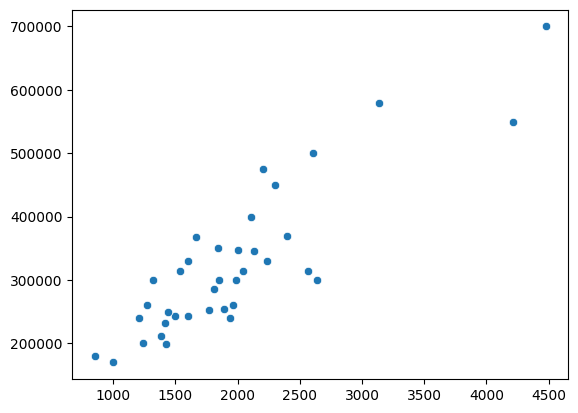

In [37]:
sns.scatterplot(X_train_house.reshape(-1), y_train_house)

#### Apply Batch Gradient Descent
Let's use our implemented `fit` method to apply batch gradient descent to the house price dataset and see what happens.

  0%|          | 0/300 [00:00<?, ?it/s]

3232.681279993404
-138991232.24886495
6120082617232.826
-2.6948009359522643e+17
1.1865774596296261e+22
-5.22474980959423e+26
2.3005670933084855e+31
-1.0129880173582688e+36
4.460399030726463e+40
-1.9640073892669893e+45
8.647937098280404e+49
-3.807868364676907e+54
1.6766844298151065e+59
-7.382793752175679e+63
3.2507991735317023e+68
-1.4313951630465296e+73
6.30273358463747e+77
-2.7752259938037682e+82
1.221990302026564e+87
-5.380679993560769e+91
Epoch 20 -  cost: 3.2157202960324867e+196
2.3692264288097226e+96
-1.0432201650512584e+101
4.593517527644379e+105
-2.022622259773837e+110
8.90603068587951e+114
-3.9215123928625455e+119
1.7267242826545297e+124
-7.603129735699672e+128
3.3478177354992525e+133
-1.4741144738722449e+138
6.49083568390735e+142
-2.858051299422783e+147
1.2584600239356255e+152
-5.541263840029415e+156
2.4399348696664085e+161
-1.0743545768761722e+166
4.7306088830665675e+170
-2.0829864633347798e+175
9.171826954384216e+179
-4.038548073254981e+184
Epoch 40 -  cost: inf
1.7782575512

C:\Users\David\AppData\Local\Temp\ipykernel_22700\122263258.py:2: RuntimeWarning: overflow encountered in square
  return ((y - y_pred) ** 2).mean() / 2
c:\Users\David\Desktop\HSLU\sem4\adml\venv\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\David\AppData\Local\Temp\ipykernel_22700\2923567656.py:6: RuntimeWarning: overflow encountered in multiply
  grad_theta1 = (epsilon * X).mean()
C:\Users\David\AppData\Local\Temp\ipykernel_22700\2799727121.py:8: RuntimeWarning: invalid value encountered in double_scalars
  theta0 = theta0 - alpha * grad_theta0
C:\Users\David\AppData\Local\Temp\ipykernel_22700\2799727121.py:9: RuntimeWarning: invalid value encountered in double_scalars
  theta1 = theta1 - alpha * grad_theta1


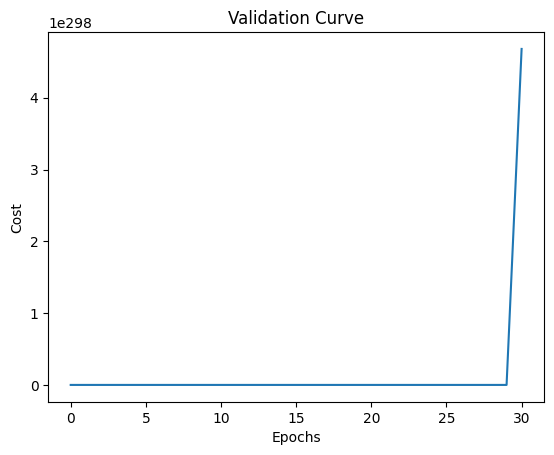

In [38]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist_house = fit(X_train_house, y_train_house, alpha, num_epochs, display_every=20)
plot_validation_curve(hist_house["cost"])

It seems like our gradient descent algorithm does not converge! 

> Why did that happen?

### Scaling the data
Let's try it again but this time we will scale the data accordingly.

In [39]:
X_house_scaled = df_house[["Size"]].values
y_house_scaled = df_house.Price.values

split = train_test_split(X_house_scaled, y_house_scaled, test_size=0.2, random_state=42)
(X_train_house_scaled, X_test_house_scaled, y_train_house_scaled, y_test_house_scaled) = split

> z-normalise the training and test data by using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [40]:
# z-normalise the training and test data.
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house_scaled).reshape(-1)
X_test_house_scaled = scaler.transform(X_test_house_scaled)

Now we apply the gradient descent algorithm again.

  0%|          | 0/300 [00:00<?, ?it/s]

3231.7016216216216
6431.086227027026
9598.476986378377
12734.193838136214
15838.553521376474
18911.86960778433
21954.45253332811
24966.60962961645
27948.645154941907
30900.86032501411
33823.55334338559
36717.01943157335
39581.55085887924
42417.43697191207
45224.964223814575
48004.41620319805
50756.07366278769
53480.214547781434
56177.11402392524
58847.04450530761
Epoch 20 -  cost: 39881831599.86566
61490.275681876155
64107.07454667902
66697.70542283385
69262.42999022713
71801.50731194648
74315.19386044863
76803.74354346577
79267.40772965272
81706.43527397783
84121.07254285966
86511.56343905268
88878.14942628378
91221.06955364256
93540.56047972776
95836.8564965521
98110.18955320821
100360.78927929775
102588.8830081264
104794.69579966676
106978.45046329172
Epoch 40 -  cost: 27198595603.156937
109140.36758028042
111280.66552609924
113399.56049245987
115497.26650915689
117573.99546568695
119629.9571326517
121665.3591829468
123680.40721273897
125675.3047622332
127650.25333623249
129605.4524

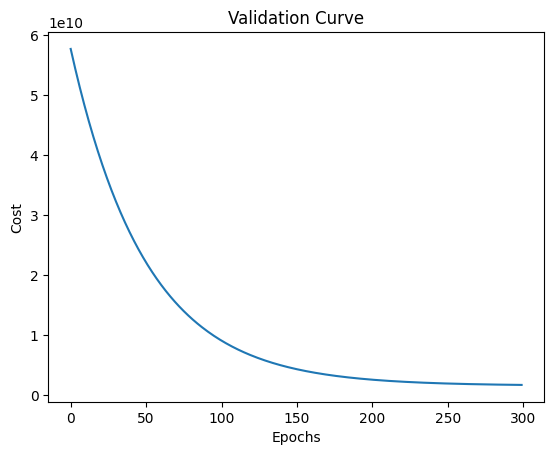

In [41]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist_house_scaled = fit(X_train_house_scaled, y_train_house_scaled, alpha, 
                                        num_epochs, display_every=20)
plot_validation_curve(hist_house_scaled["cost"])

Our validation curve looks much better now. We see that the cost converges after a few epochs.

Again we can visualize how our regression line looks after each epoch.

In [42]:
@interact(epoch=(1, len(hist_house_scaled["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X_train_house_scaled, y_train_house_scaled)
    plot_regression_line(X_train_house_scaled, 
                         hist_house_scaled["theta0"][epoch-1], 
                         hist_house_scaled["theta1"][epoch-1], ax)
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=300, min=1), Output()), _dom_classes=('widge…

### Calculate metrics on the test set
> Now calculate the $R^2$ score on the test set by using the previously implemented `predict` function.

In [43]:
y_pred_house_scaled = predict(X_test_house_scaled, theta0, theta1)
r2_score(y_test_house_scaled, y_pred_house_scaled)

0.4065093189226092

## Part 3 -  Autoscout data set
We extend our code for multiple linear regression. We will use the autoscout dataset from the previous exercises. First we apply the data cleaning and then z-Normalise our data.

In [44]:
df_autoscout = pd.read_csv('cars.csv')
df_autoscout.drop(['Name', 'Registration'], axis='columns', inplace=True)
df_autoscout.drop([17010, 7734, 47002, 44369, 24720, 50574, 36542, 42611,
         22513, 12773, 21501, 2424, 52910, 29735, 43004, 47125], axis='rows', inplace=True)
df_autoscout.drop(df_autoscout.index[df_autoscout.EngineSize > 7500], axis='rows', inplace=True)
df_autoscout.drop_duplicates(inplace=True)
df_autoscout.head()

numerical_cols = ['Price', 'Mileage', 'Horsepower', 'EngineSize']

df_autoscout = pd.get_dummies(df_autoscout)

train_autoscout, test_autoscout = train_test_split(df_autoscout, test_size=0.4, random_state=42)

q3 = train_autoscout.loc[:, numerical_cols].describe().loc['75%']
iqr = q3 - df_autoscout.loc[:, numerical_cols].describe().loc['25%']
upper_boundary = q3 + 1.5*iqr
upper_boundary

# And here the outliers are removed
train_autoscout = train_autoscout[(train_autoscout.Price <= upper_boundary.Price) &
        (train_autoscout.Mileage <= upper_boundary.Mileage) &
        (train_autoscout.Horsepower <= upper_boundary.Horsepower) &
        (train_autoscout.EngineSize <= upper_boundary.EngineSize)]

test_autoscout = test_autoscout[(test_autoscout.Price <= upper_boundary.Price) &
        (test_autoscout.Mileage <= upper_boundary.Mileage) &
        (test_autoscout.Horsepower <= upper_boundary.Horsepower) &
        (test_autoscout.EngineSize <= upper_boundary.EngineSize)]

X_train_autoscout = train_autoscout.drop(columns=["Price"]).values
X_test_autoscout = test_autoscout.drop(columns=["Price"]).values

y_train_autoscout = train_autoscout.Price.values
y_test_autoscout = test_autoscout.Price.values

# z-Normalise the data
scaler = StandardScaler()
X_train_autoscout = scaler.fit_transform(X_train_autoscout)
X_test_autoscout = scaler.transform(X_test_autoscout)

We modify our predict function that instead of providing $\theta_0$ and $\theta_1$ we now provide the bias ($\theta_0$) and the other parameters $\Theta$ as an array. 
> Implement the `predict` function

In [64]:
def predict(X, bias, thetas):
    y_pred = bias + np.dot(X, thetas)
    return y_pred

> Implement the `gradient` function

In [75]:
def gradient(X, y, bias, thetas):
    y_pred = predict(X, bias, thetas)
    epsilon = y_pred - y
    
    n = len(X)
    grad_bias = epsilon.mean()
    grad_thetas = np.dot(epsilon, X) / n
    
    return grad_bias, grad_thetas

We extend our `fit` function by tracking not only the cost but also the $R^2$ score.

In [73]:
def fit(X_train, y_train, alpha, num_epochs, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs+1)):
        grad_bias, grad_thetas = gradient(X_train, y_train, bias, thetas)
        bias = bias - alpha * grad_bias
        thetas = thetas - alpha * grad_thetas
        
        y_pred_train = predict(X_train, bias, thetas)
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        
        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0:
            print("Epoch {0} - cost: {1:.2} - r2: {2:.4}"
                  .format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

In [74]:
alpha = 0.01
num_epochs = 1000
bias, thetas, hist_autoscout = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50 - cost: 1.4e+08 - r2: -0.198
Epoch 100 - cost: 7e+07 - r2: 0.4164
Epoch 150 - cost: 4.5e+07 - r2: 0.6264
Epoch 200 - cost: 3.6e+07 - r2: 0.7027
Epoch 250 - cost: 3.2e+07 - r2: 0.7313
Epoch 300 - cost: 3.1e+07 - r2: 0.7423
Epoch 350 - cost: 3e+07 - r2: 0.7468
Epoch 400 - cost: 3e+07 - r2: 0.7487
Epoch 450 - cost: 3e+07 - r2: 0.7496
Epoch 500 - cost: 3e+07 - r2: 0.7501
Epoch 550 - cost: 3e+07 - r2: 0.7504
Epoch 600 - cost: 3e+07 - r2: 0.7506
Epoch 650 - cost: 3e+07 - r2: 0.7508
Epoch 700 - cost: 3e+07 - r2: 0.7509
Epoch 750 - cost: 3e+07 - r2: 0.751
Epoch 800 - cost: 3e+07 - r2: 0.7511
Epoch 850 - cost: 3e+07 - r2: 0.7511
Epoch 900 - cost: 3e+07 - r2: 0.7512
Epoch 950 - cost: 3e+07 - r2: 0.7512
Epoch 1000 - cost: 3e+07 - r2: 0.7512


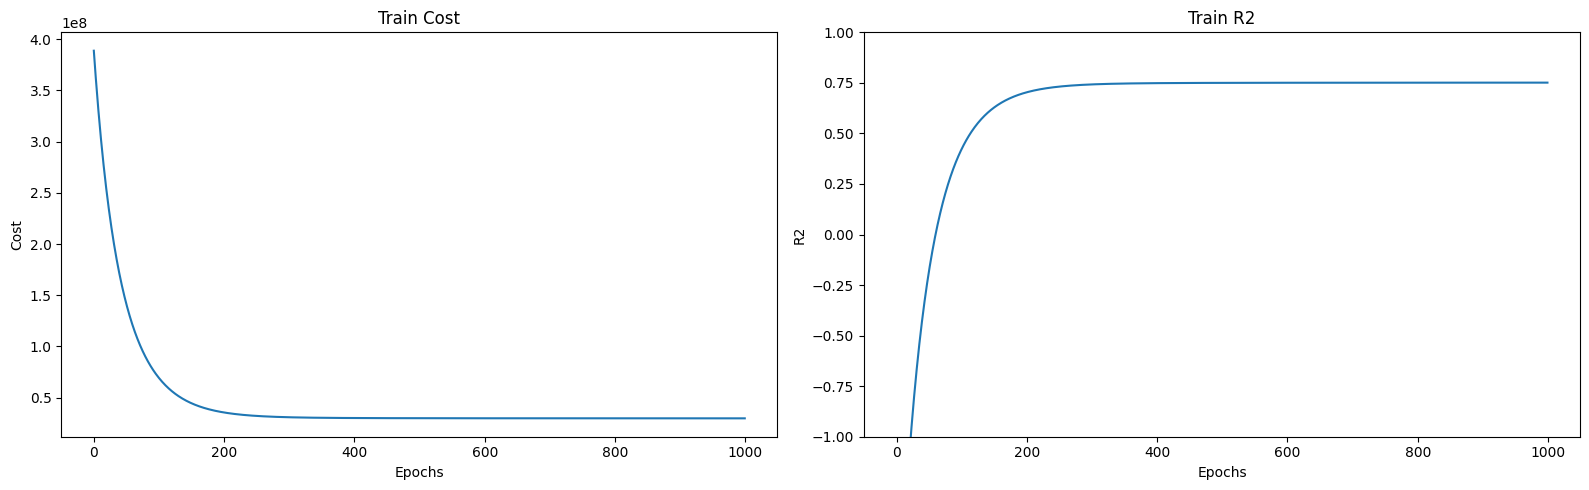

In [76]:
def plot_validation_curves(hist, ylim=None):
    fig, ax = plt.subplots(ncols=2, figsize=(16,5))

    ax[0].set_title("Train Cost")
    ax[0].set_ylabel("Cost")
    plot_validation_curve(hist["train_cost"], ax[0], ylim)

    ax[1].set_title("Train R2")
    ax[1].set_ylabel("R2")
    ax[1].set_ylim(-1, 1)
    plot_validation_curve(hist["train_r2"], ax[1])

    plt.tight_layout()

plot_validation_curves(hist_autoscout)

### Calculate metrics on test set
Now we calculate the $R^2$ score on the test set.

In [77]:
y_pred_autoscout = predict(X_test_autoscout, bias, thetas)
r2 = r2_score(y_test_autoscout, y_pred_autoscout)
print("R2:", r2)

R2: 0.7477927726450773


Compared to the previous exercise where we calculated the estimates for the $\Theta$ numerically using the normal equation we got almost the same result with the gradient descent algorithm.

### Minibatch Gradient Descent

> Now  modify our `fit` function to use mini batch gradient descent. So instead of calculating the gradient on the whole dataset on each step, only use a subset of the data.

In [78]:
def fit(X_train, y_train, alpha, num_epochs, batch_size, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    hist = defaultdict(list)
    
    indices_train = np.arange(len(X_train))
    
    num_samples = len(X_train)
    steps = int(num_samples / batch_size)
    
    for epoch in tqdm(range(1, num_epochs + 1)):
        # randomize inputs
        np.random.shuffle(indices_train)
        
        X_train_epoch = X_train[indices_train]
        y_train_epoch = y_train[indices_train]
        
        for step in range(steps):
            start = step * batch_size
            end = step * batch_size + batch_size
            
            X_train_mini = X_train_epoch[start:end]
            y_train_mini = y_train_epoch[start:end]
        
            grad_bias, grad_thetas = gradient(X_train_mini, y_train_mini, bias, thetas)
            bias = bias - alpha * grad_bias
            thetas = thetas - alpha * grad_thetas

        y_pred_train = predict(X_train, bias, thetas)
        
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)

        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0 or epoch == num_epochs:
            print("Epoch {0} - train_cost: {1:.2} - train_r2: {2:.4}".format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

Wo have now introduced an additional hyperparameter `batch_size`. 
* If we set `batch_size` equal to 1, we use Stochastic Gradient Desccent: We update our model parameters $\Theta$ for each training example. 
* If we set `batch_size` equal to to the number of training samples we have again Batch Gradient Descent: We use all training samples to update the model parameters $\Theta$.

#### Batch Gradient Descent
We run batch gradient descent and see what happens

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 50 - train_cost: 1.4e+08 - train_r2: -0.1979


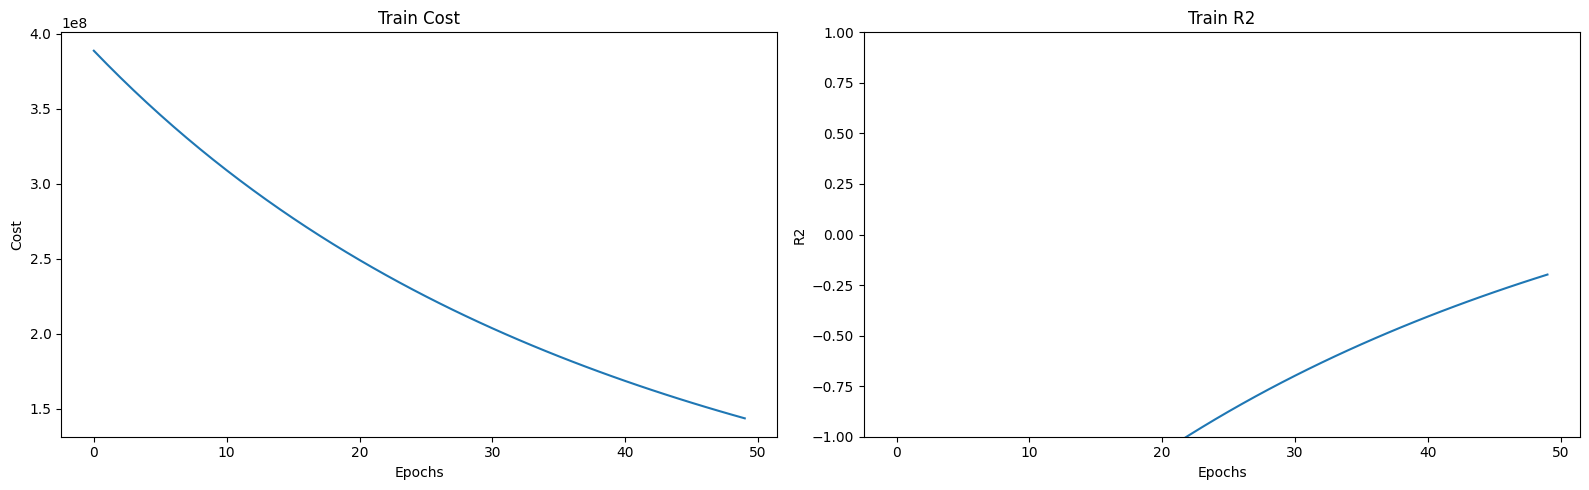

In [97]:
alpha = 1e-2
num_epochs = 50
batch_size = len(X_train_autoscout)

bias, thetas, hist_autoscout_batch = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs, batch_size)
plot_validation_curves(hist_autoscout_batch)

We can notice the following:
* The training did not converge after those 50 epochs. We would need more epochs.
* The training cost is strictly decreasing as we take all training samples per step

#### Minibatch Gradient Descnet
Let's compare it to minibatch gradient descent with a `batch_size` of 100.

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 50 - train_cost: 3e+07 - train_r2: 0.7511


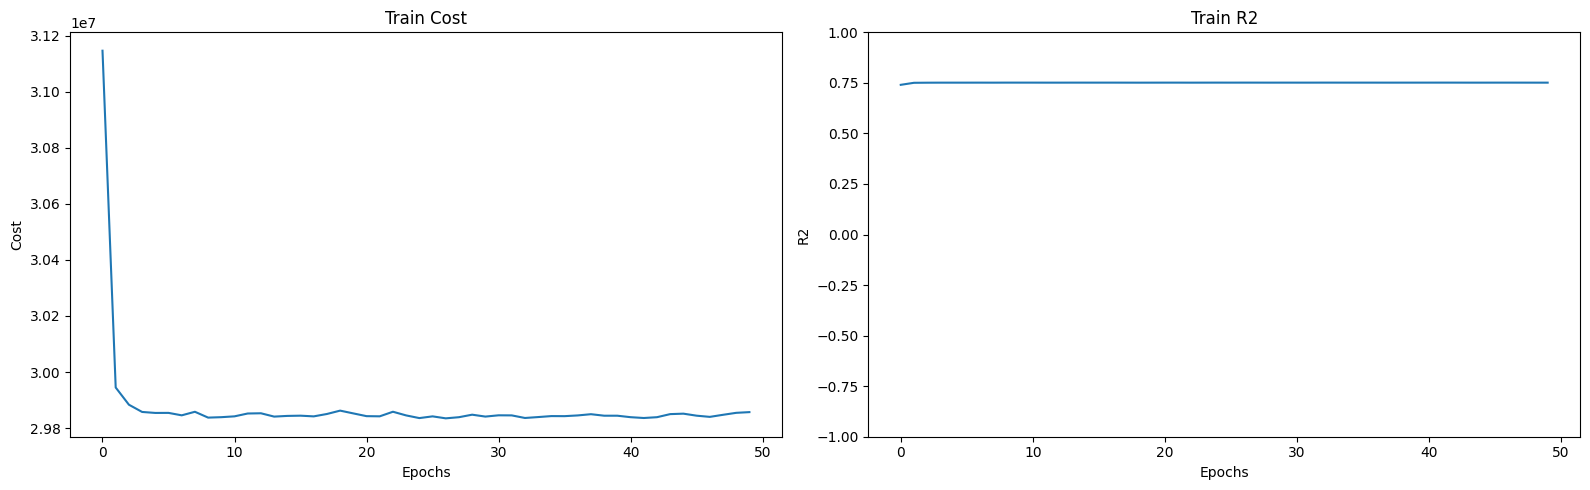

In [102]:
alpha = 1e-2
num_epochs = 50
batch_size = 100

bias, thetas, hist_autoscout_minibatch = fit(X_train_autoscout, y_train_autoscout, alpha, num_epochs, batch_size)
plot_validation_curves(hist_autoscout_minibatch)

* As we are taking only a subset of our data when applying gradient descent, the training cost are not stricly decreasing anymore. 
* We do not need as many epochs as before as we are doing much more updates now.

### Calculate the performance on the test set

In [103]:
y_pred_autoscout = predict(X_test_autoscout, bias, thetas)
r2 = r2_score(y_test_autoscout, y_pred_autoscout)
print("R2:", r2)

R2: 0.7479676644268372
